In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3
import numpy as np
from collections import Counter

In [2]:
proteomic_diff_expression = pd.read_csv('data/Proteomics_differential_expression_df.csv')
transcriptomic_diff_expression = pd.read_csv('data/Transcriptomics_differential_expression_df.csv')
delta_corr_pvals = pd.read_csv('data/delta_correlation_df.csv')



In [3]:
cancers = ['CCRCC', 'HNSCC', 'LUAD', 'LSCC', 'Endometrial']

In [4]:
# filter to only include genes with significant changes
proteomic_diff_expression = proteomic_diff_expression[proteomic_diff_expression.FDR < 0.05]
proteomic_diff_expression = proteomic_diff_expression[np.array(proteomic_diff_expression.Log2_fold_change > 1) | 
                                                     np.array(proteomic_diff_expression.Log2_fold_change < -1)]

delta_corr_pvals = delta_corr_pvals[delta_corr_pvals.FDR < 0.05]

In [5]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

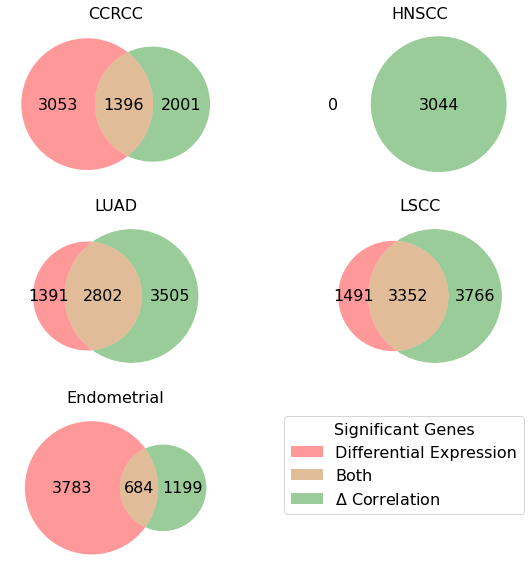

In [6]:
#proteomics comparison
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10))
row = 0
col = 0
labels = ['Differential Expression','Both', r'$\Delta$' + ' Correlation']
for cancer in cancers:
    if col == 2:
        row += 1
        col = 0
    sig_prot = set(proteomic_diff_expression[proteomic_diff_expression.Cancer == cancer].Gene)
    sig_corr = set(delta_corr_pvals[delta_corr_pvals.Cancer == cancer].Gene)
    plt.sca(ax[row][col])
    sets = Counter()
    sets['10'] = len(sig_prot - sig_corr)
    sets['11'] = len(sig_prot & sig_corr)
    sets['01'] = len(sig_corr - sig_prot)
    v = venn2(subsets = sets, set_labels = ['', ''], ax = plt.gca())
    plt.gca().set_title(cancer)
    col += 1
h = []
for i in sets:
    h.append(v.get_patch_by_id(i))   
plt.legend(handles=h, labels=labels, bbox_to_anchor=(2.5, 1), title = 'Significant Genes')
fig.delaxes(ax[2][1])
#fig.tight_layout()
plt.savefig('Figures/Figure S2) Differential Protein Expression vs Correlation Change.png', bbox_inches='tight')
plt.show()